In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(len(x_train))

2.4.1
11493376/11490434 [==============================] - 0s 0us/step
60000


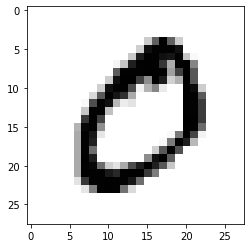

In [4]:
plt.imshow(x_train[1], cmap=plt.cm.binary)
plt.show()    

In [5]:
print(y_train[1])

0


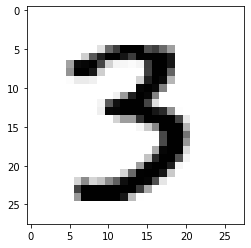

10001 번째 이미지의 숫자는 바로 3 입니다.


In [10]:
index = 10000
plt.imshow(x_train[index], cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로', y_train[index], '입니다.')

In [11]:
print(x_train.shape)

(60000, 28, 28)


In [12]:
print(x_test.shape)

(10000, 28, 28)


In [13]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [14]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


In [15]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [17]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [18]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 0.4774 - accuracy: 0.8591
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0755 - accuracy: 0.9763
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0542 - accuracy: 0.9833
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0412 - accuracy: 0.9877
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0317 - accuracy: 0.9892
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0267 - accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0235 - accuracy: 0.9928
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0218 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0177 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.014

In [19]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 2s - loss: 0.0290 - accuracy: 0.9909
test_loss: 0.029035260900855064 
test_accuracy: 0.9908999800682068


In [20]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [2.8377034e-08 1.7156538e-07 2.6408641e-06 9.7342729e-07 4.2940025e-09
 2.5523395e-10 1.4084196e-11 9.9999607e-01 4.7876593e-08 1.8792599e-08]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


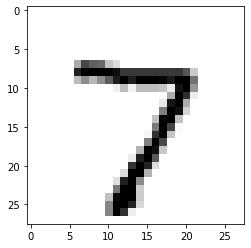

In [21]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [1.2390983e-08 3.8061240e-05 7.4093342e-01 3.3012716e-07 3.8346716e-08
 2.3048026e-12 2.1909776e-11 2.5902817e-01 1.0414406e-09 4.0451282e-14]
라벨: 7, 예측결과: 2


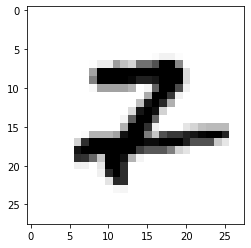

예측확률분포: [1.4052068e-09 2.7556085e-10 2.6667321e-12 1.5154194e-06 5.5078227e-11
 6.5237153e-01 3.4698808e-01 7.2618761e-10 6.3822541e-04 5.3207543e-07]
라벨: 6, 예측결과: 5


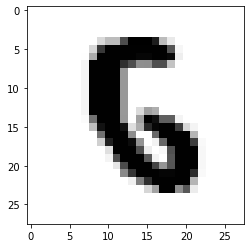

예측확률분포: [6.9671100e-09 2.3251037e-07 6.9881446e-07 2.7440517e-04 7.0921785e-01
 1.0969330e-07 1.1409612e-08 1.2676442e-05 3.0988867e-05 2.9046306e-01]
라벨: 9, 예측결과: 4


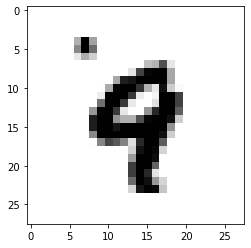

예측확률분포: [2.9168472e-09 2.5105548e-05 2.5342580e-02 7.4966260e-07 6.2884903e-04
 4.0694319e-09 2.6517785e-10 9.7400045e-01 2.3238917e-06 7.7226637e-12]
라벨: 2, 예측결과: 7


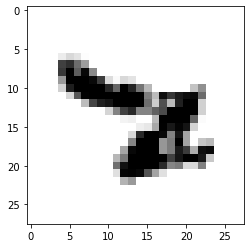

예측확률분포: [1.0513881e-07 6.5063802e-03 4.0776908e-06 3.8955131e-01 1.3682179e-02
 5.4563802e-01 1.4480576e-08 4.0742710e-02 2.1175794e-08 3.8751701e-03]
라벨: 3, 예측결과: 5


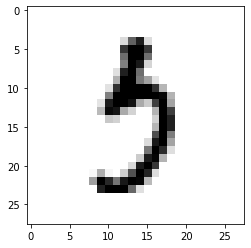

In [23]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [33]:
n_channel_1=13
n_channel_2=22
n_dense=110
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 13)        130       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 13)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 22)        2596      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 22)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 550)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 110)               60610     
_________________________________________________________________
dense_21 (Dense)             (None, 10)              